### Data Downloading

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.crowdanalytix.com/contests/identify-characters-from-product-images" "https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Test.zip" -O "CAX_Characters_Test.zip" -c

--2019-06-05 14:31:07--  https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100419963 (96M) [application/zip]
Saving to: ‘CAX_Characters_Test.zip’

CAX_Characters_Test 100%[===================>]  95.77M  51.3MB/s    in 1.9s    

2019-06-05 14:31:09 (51.3 MB/s) - ‘CAX_Characters_Test.zip’ saved [100419963/100419963]



In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.crowdanalytix.com/contests/identify-characters-from-product-images" "https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Train.zip" -O "CAX_Characters_Train.zip" -c

--2019-06-05 14:31:12--  https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190442283 (182M) [application/zip]
Saving to: ‘CAX_Characters_Train.zip’

CAX_Characters_Trai 100%[===================>] 181.62M  50.9MB/s    in 3.6s    

2019-06-05 14:31:16 (50.9 MB/s) - ‘CAX_Characters_Train.zip’ saved [190442283/190442283]



### Data Preprocessing

In [0]:
!mkdir data
!unzip -qq CAX_Characters_Test.zip -d data
!unzip -qq CAX_Characters_Train.zip -d data

In [0]:
import os

def replace(parent):
    for path, folders, files in os.walk(parent):
        for f in files:
            os.rename(os.path.join(path, f), os.path.join(path, f.replace(' ', '_')))
        for i in range(len(folders)):
            new_name = folders[i].replace(' ', '_')
            os.rename(os.path.join(path, folders[i]), os.path.join(path, new_name))
            folders[i] = new_name

In [0]:
replace('data')

In [0]:
from fastai.vision import *

In [0]:
from pathlib import Path
path = Path('data/CAX_Characters_Train/')

In [0]:
PATH = 'data'

In [0]:
from os import listdir
from os.path import join
train_path = f'{PATH}/CAX_Characters_Train'

In [10]:
dirs = [d for d in listdir(train_path) if os.path.isdir(join(train_path,d))]
print(dirs)

['power_rangers', 'vegeta', 'popeye', 'itachi', 'Roman_Reigns', 'charizard', 'Godzilla', 'mickey_mouse', 'vampirina', 'Chicken_little', 'harry_potter', 'naruto', 'Charlie_brown', 'han-solo', 'ben', 'bulbasaur', 'R2-D2', 'disney_princes', 'pikachu', 'squirtle', 'SpongeBob_SquarePants', 'darth_vader', 'teenage_mutant', 'angrybirds', 'Baloo', 'Cinderella', 'Winnie_the_poo', 'donald_duck', 'toy_story_characters', 'charmander', 'Tom_and_Jerry', 'pokemon', 'kakashi', 'hellokitty', 'goofy', 'Bart_simpson', 'minions', 'jojosiwa', 'marilyn_monroe', 'John_Cena', 'Scoopy_Doo', 'Goku_1']


In [11]:
len(dirs)

42

In [12]:
doc(verify_images)

TypeError: ignored

In [13]:
for folder in dirs:
  print(folder)
  verify_images(path/folder, delete=False, max_size=500)

power_rangers


vegeta


popeye


itachi


Roman_Reigns


charizard


Godzilla


mickey_mouse


vampirina


Chicken_little


harry_potter


naruto


Charlie_brown


han-solo


ben


bulbasaur


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


R2-D2


disney_princes


pikachu


squirtle


SpongeBob_SquarePants


darth_vader


teenage_mutant


angrybirds


Baloo


Cinderella


Winnie_the_poo


donald_duck


toy_story_characters


charmander


Tom_and_Jerry


pokemon


kakashi


hellokitty


goofy


Bart_simpson


minions


jojosiwa


marilyn_monroe


John_Cena


Scoopy_Doo


Goku_1


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
path_img = path/'vegeta'

In [18]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('data/CAX_Characters_Train/vegeta/Cax_train6455.jpg'),
 PosixPath('data/CAX_Characters_Train/vegeta/Cax_train6440.jpg'),
 PosixPath('data/CAX_Characters_Train/vegeta/Cax_train6361.jpg'),
 PosixPath('data/CAX_Characters_Train/vegeta/Cax_train6461.jpg'),
 PosixPath('data/CAX_Characters_Train/vegeta/Cax_train6343.jpg')]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [20]:
data.classes

['Baloo',
 'Bart_simpson',
 'Charlie_brown',
 'Chicken_little',
 'Cinderella',
 'Godzilla',
 'Goku_1',
 'John_Cena',
 'R2-D2',
 'Roman_Reigns',
 'Scoopy_Doo',
 'SpongeBob_SquarePants',
 'Tom_and_Jerry',
 'Winnie_the_poo',
 'angrybirds',
 'ben',
 'bulbasaur',
 'charizard',
 'charmander',
 'darth_vader',
 'disney_princes',
 'donald_duck',
 'goofy',
 'han-solo',
 'harry_potter',
 'hellokitty',
 'itachi',
 'jojosiwa',
 'kakashi',
 'marilyn_monroe',
 'mickey_mouse',
 'minions',
 'naruto',
 'pikachu',
 'pokemon',
 'popeye',
 'power_rangers',
 'squirtle',
 'teenage_mutant',
 'toy_story_characters',
 'vampirina',
 'vegeta']

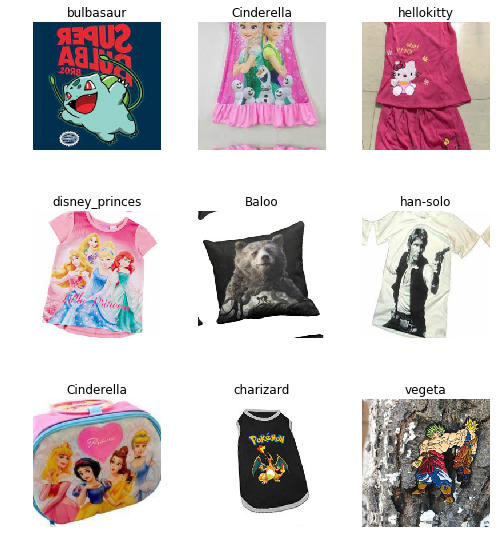

In [21]:
data.show_batch(rows=3, figsize=(7,8))

In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Baloo',
  'Bart_simpson',
  'Charlie_brown',
  'Chicken_little',
  'Cinderella',
  'Godzilla',
  'Goku_1',
  'John_Cena',
  'R2-D2',
  'Roman_Reigns',
  'Scoopy_Doo',
  'SpongeBob_SquarePants',
  'Tom_and_Jerry',
  'Winnie_the_poo',
  'angrybirds',
  'ben',
  'bulbasaur',
  'charizard',
  'charmander',
  'darth_vader',
  'disney_princes',
  'donald_duck',
  'goofy',
  'han-solo',
  'harry_potter',
  'hellokitty',
  'itachi',
  'jojosiwa',
  'kakashi',
  'marilyn_monroe',
  'mickey_mouse',
  'minions',
  'naruto',
  'pikachu',
  'pokemon',
  'popeye',
  'power_rangers',
  'squirtle',
  'teenage_mutant',
  'toy_story_characters',
  'vampirina',
  'vegeta'],
 42,
 5356,
 1338)

### Modelling

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 26543933.98it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02


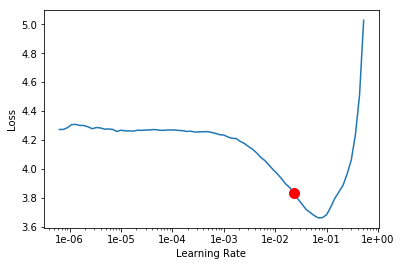

In [24]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
lr = 0.01

In [26]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,2.750948,1.860342,0.523169,01:20
1,1.982573,1.463116,0.419283,01:20
2,1.449238,1.193638,0.334081,01:20
3,1.099980,1.109253,0.302691,01:20
4,0.870884,1.075645,0.302691,01:21


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


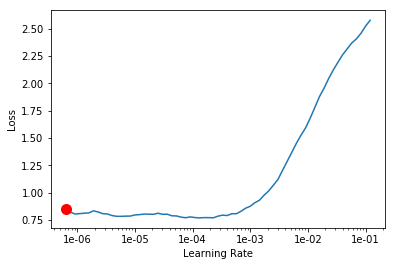

In [28]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [29]:
learn.fit_one_cycle(5, slice(1e-4, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.968847,1.736800,0.449925,01:23
1,1.116197,1.549023,0.384903,01:23
2,0.755596,1.009015,0.277280,01:23
3,0.433955,0.734118,0.199552,01:23
4,0.213681,0.705671,0.195067,01:23


### Looking at result

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

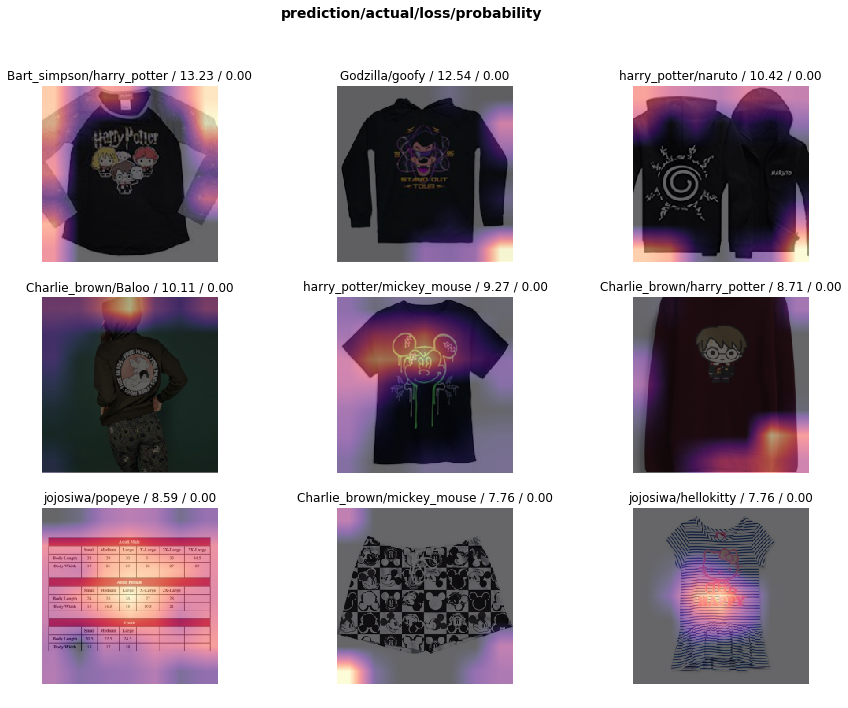

In [31]:
interp.plot_top_losses(9, figsize=(15, 11))

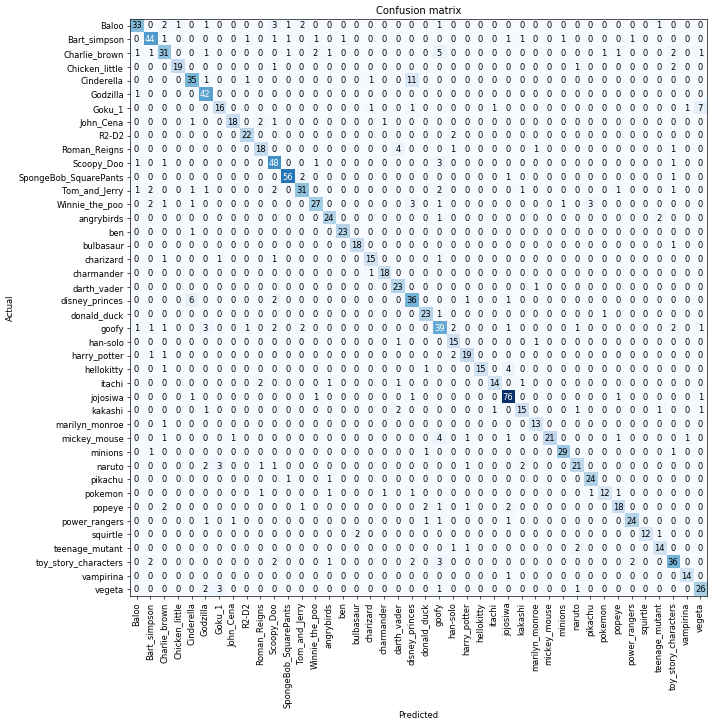

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [33]:
interp.most_confused(min_val=2)

[('Cinderella', 'disney_princes', 11),
 ('Goku_1', 'vegeta', 7),
 ('disney_princes', 'Cinderella', 6),
 ('Charlie_brown', 'goofy', 5),
 ('Roman_Reigns', 'darth_vader', 4),
 ('hellokitty', 'jojosiwa', 4),
 ('mickey_mouse', 'goofy', 4),
 ('Baloo', 'Scoopy_Doo', 3),
 ('Scoopy_Doo', 'goofy', 3),
 ('Winnie_the_poo', 'disney_princes', 3),
 ('Winnie_the_poo', 'pikachu', 3),
 ('goofy', 'Godzilla', 3),
 ('naruto', 'Goku_1', 3),
 ('toy_story_characters', 'goofy', 3),
 ('vegeta', 'Goku_1', 3),
 ('Baloo', 'Charlie_brown', 2),
 ('Baloo', 'Tom_and_Jerry', 2),
 ('Charlie_brown', 'Winnie_the_poo', 2),
 ('Charlie_brown', 'toy_story_characters', 2),
 ('Chicken_little', 'toy_story_characters', 2),
 ('John_Cena', 'Roman_Reigns', 2),
 ('R2-D2', 'han-solo', 2),
 ('SpongeBob_SquarePants', 'Tom_and_Jerry', 2),
 ('Tom_and_Jerry', 'Bart_simpson', 2),
 ('Tom_and_Jerry', 'Scoopy_Doo', 2),
 ('Tom_and_Jerry', 'goofy', 2),
 ('Winnie_the_poo', 'Bart_simpson', 2),
 ('angrybirds', 'teenage_mutant', 2),
 ('disney_prince

In [0]:
learn.save('stage-trial')

In [0]:
learn.export()

### Test set prediction

In [36]:
PATH

'data'

In [37]:
path

PosixPath('data/CAX_Characters_Train')

In [40]:
test = ImageList.from_folder(PATH+'/test_characters_new')
len(test)

3727

In [0]:
learn = load_learner(path, test=test)

In [57]:
preds, _ = learn.TTA(ds_type=DatasetType.Test)

In [60]:
probs = np.exp(preds)
probs.shape

torch.Size([3727, 42])

In [0]:
probs = np.argmax(probs, axis=1)

In [62]:
probs.shape

torch.Size([3727])

In [0]:
labels = [learn.data.classes[i] for i in probs]

In [66]:
len(labels)

3727

In [0]:
fnames = [f.name[:] for f in learn.data.test_ds.items]

In [68]:
len(fnames)

3727

In [0]:
df = pd.DataFrame({'Filename':fnames, 'Prediction':labels}, columns=['Filename', 'Prediction'])

In [70]:
df.head()

,Filename,Prediction
0,Cax_test561.jpg,Charlie_brown
1,Cax_test36.jpg,angrybirds
2,Cax_test3615.jpg,Goku_1
3,Cax_test1237.jpg,Goku_1
4,Cax_test2493.jpg,naruto


In [73]:
!wget --header="Host: www.crowdanalytix.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.crowdanalytix.com/contest/reportSubmission.html?taskId=587" --header="Cookie: _ga=GA1.2.330039987.1559630561; _gid=GA1.2.1956152728.1559630561; _fbp=fb.1.1559630561401.1514054324; JSESSIONID=CD2388CBAA7CAC40BF576DE879A799CA; ca_rm=Z2F1cmF2Y2hvcHJhY2c6MTU2MDg2MDc5NDY5NDpaMkYxY21GMlkyaHZjSEpoWTJjNk1UVTJNRGcyTURjNU5EWTJOem96WlRGbVlXVTJZelV3WmpFNE5XRXlObU0yWWpSaE9ESTJaRGMyTlRsaVln; __atuvc=12%7C23; __atuvs=5cf663c3b594c15b001; _gat_UA-5568054-8=1; _gat=1" --header="Connection: keep-alive" "https://www.crowdanalytix.com/contests/json/download/templateFile/CAX_Characters_SubmissionFormat.csv/587" -O "CAX_Characters_SubmissionFormat.csv" -c

--2019-06-05 15:33:44--  https://www.crowdanalytix.com/contests/json/download/templateFile/CAX_Characters_SubmissionFormat.csv/587
Resolving www.crowdanalytix.com (www.crowdanalytix.com)... 54.251.104.149
Connecting to www.crowdanalytix.com (www.crowdanalytix.com)|54.251.104.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘CAX_Characters_SubmissionFormat.csv’

CAX_Characters_Subm     [    <=>             ]  68.09K  78.9KB/s    in 0.9s    

2019-06-05 15:33:49 (78.9 KB/s) - ‘CAX_Characters_SubmissionFormat.csv’ saved [69727]



In [0]:
submission = pd.read_csv("CAX_Characters_SubmissionFormat.csv")

In [75]:
submission.head()

,Filename,Prediction
0,Cax_test1.jpg,NaN
1,Cax_test16.jpg,NaN
2,Cax_test17.jpg,NaN
3,Cax_test20.jpg,NaN
4,Cax_test22.jpg,NaN


In [0]:
submission.head()

,Filename,Prediction
0,Cax_test1.jpg,NaN
1,Cax_test16.jpg,NaN
2,Cax_test17.jpg,NaN
3,Cax_test20.jpg,NaN
4,Cax_test22.jpg,NaN


In [0]:
submission.drop('Prediction', axis=1, inplace=True)

In [0]:
submission = submission.merge(df, left_on='Filename', right_on='Filename', how='outer')

In [78]:
submission.head()

,Filename,Prediction
0,Cax_test1.jpg,angrybirds
1,Cax_test16.jpg,vampirina
2,Cax_test17.jpg,angrybirds
3,Cax_test20.jpg,angrybirds
4,Cax_test22.jpg,angrybirds


In [79]:
submission.shape

(3727, 2)

In [0]:
submission.to_csv(path/'submission.csv', index=False)